In [1]:
# importing all the required packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [2]:
df = pd.read_csv("course_threads.csv") #loading the dataset
df.head(2)

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13


In [3]:
df1 = pd.read_csv("course_information.csv") #loading the dataset
df1.head(2)

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392


In [4]:
df2 = pd.read_csv("course_posts.csv") #loading the dataset
df2.head(2)

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13


# Figure 1

In [5]:
df1_sort = df1.sort_values(by = 'num_threads' , ascending = False) #sorting the values of the column in descending order
df1_sort.head(2)

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
33,Introduction to Psychology,intropsych-001,8,5,5/6/2013,NaN,S,E,9300,?,11989
58,Video Games and Learning,videogameslearning-001,6,5,10/3/2013,NaN,E,E,8694,NaN,3415


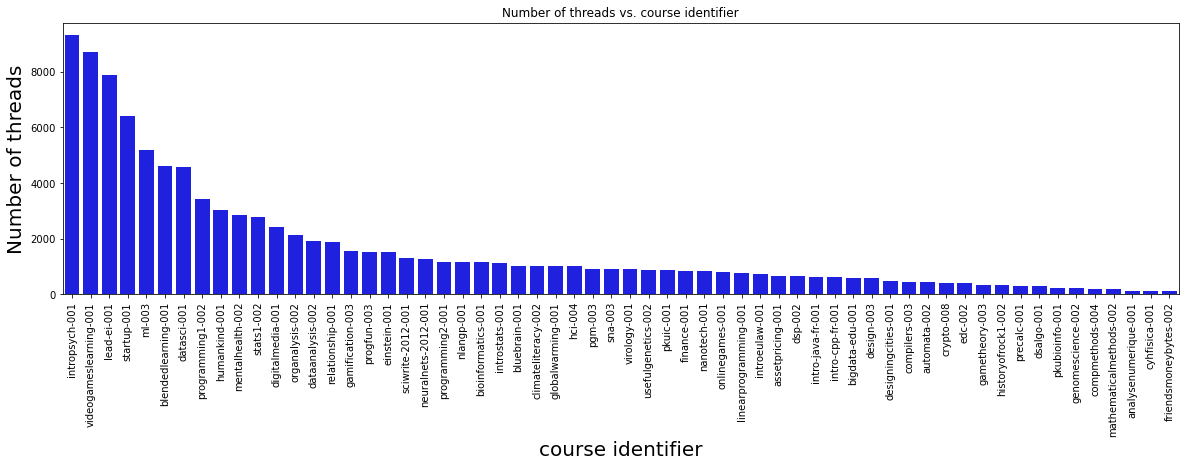

In [6]:
#plotting bar graph for graph 1
plt.figure(figsize=(20,5))
sns.barplot(data = df1_sort, x = 'course_id' , y = 'num_threads' , color = 'blue')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Number of threads vs. course identifier')
plt.ylabel('Number of threads', fontsize=20)
plt.xlabel('course identifier', fontsize=20)
plt.show()

# Figure 3

In [7]:
df2_groupby = df2.groupby('user_type')['post_id'].count().to_frame().reset_index() #grouping the user_type with respect to post_id

In [8]:
df2_sort = df2_groupby.sort_values(by = 'post_id' , ascending = False) ##sorting the values in descending order
df2_sort

,user_type,post_id
6,Student,630713
0,Anonymous,70531
1,Community TA,17336
5,Staff,11986
4,Instructor,8118
3,Coursera Tech Support,228
2,Coursera Staff,162


Text(0, 0.5, 'Number of messages')

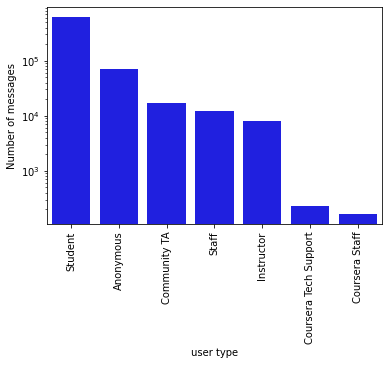

In [9]:
#plotting bar graph for graph 3
sns.barplot(x = 'user_type' , y = 'post_id' , 
                    data = df2_sort , color = 'blue')
plt.yscale('log')
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('user type')
plt.ylabel('Number of messages')

# Figure 4

In [10]:
df2['is_post'] = df2.parent_id==0 #checking for posts in parent_id
df2['is_post']

0          True
1          True
2          True
3          True
4          True
          ...  
739069    False
739070    False
739071    False
739072     True
739073     True
Name: is_post, Length: 739074, dtype: bool

In [11]:
# grouping the columns
tmp = df2.groupby(['course_id', 'thread_id', 'is_post']).count()[['post_id']].reset_index() 
tmp

,course_id,thread_id,is_post,post_id
0,analysenumerique-001,2,False,2
1,analysenumerique-001,2,True,9
2,analysenumerique-001,3,False,3
3,analysenumerique-001,3,True,16
4,analysenumerique-001,4,True,2
...,...,...,...,...
136402,virology-001,911,True,5
136403,virology-001,912,True,2
136404,virology-001,913,False,4
136405,virology-001,913,True,4


In [12]:
tmp['count'] = tmp['post_id'] # replacing the column post_id with count
tmp.drop('post_id', axis=1, inplace=True)
tmp.head()

,course_id,thread_id,is_post,count
0,analysenumerique-001,2,False,2
1,analysenumerique-001,2,True,9
2,analysenumerique-001,3,False,3
3,analysenumerique-001,3,True,16
4,analysenumerique-001,4,True,2


In [13]:
tmp['num_posts'] = 0
tmp['num_comments'] = 0

#checking if it's a post or a commentan and replacing it with the value from count
tmp.loc[tmp.is_post == True, 'num_posts'] = tmp['count']
tmp.loc[tmp.is_post==False, 'num_comments'] = tmp['count']
tmp.head()

,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,False,2,0,2
1,analysenumerique-001,2,True,9,9,0
2,analysenumerique-001,3,False,3,0,3
3,analysenumerique-001,3,True,16,16,0
4,analysenumerique-001,4,True,2,2,0


In [14]:
tmp = tmp.groupby(['course_id', 'thread_id']).max().reset_index()
tmp.head()

,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,True,9,9,2
1,analysenumerique-001,3,True,16,16,3
2,analysenumerique-001,4,True,2,2,0
3,analysenumerique-001,7,True,3,3,0
4,analysenumerique-001,8,True,8,8,1


In [15]:
#creating a dataframe where forum_=3,4 and merging the with earlier dataframe tmp
fig4_dat = df.query("forum_id == 4|forum_id==3").merge(tmp, on=['course_id', 'thread_id'])
fig4_dat.head(2)

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id,is_post,count,num_posts,num_comments
0,5,assetpricing-001,Quizzes and Homeworks,3,Forums,0.0,Forums/ Quizzes and Homeworks,2,242,0,3,True,5,5,0
1,6,assetpricing-001,Quizzes and Homeworks,3,Forums,0.0,Forums/ Quizzes and Homeworks,2,122,0,3,True,4,4,0


In [16]:
#creating a dataframe with only three columns
fig4_dat = fig4_dat[['forum_id', 'num_posts', 'num_comments']]
fig4_dat.head(2)

,forum_id,num_posts,num_comments
0,3,5,0
1,3,4,0


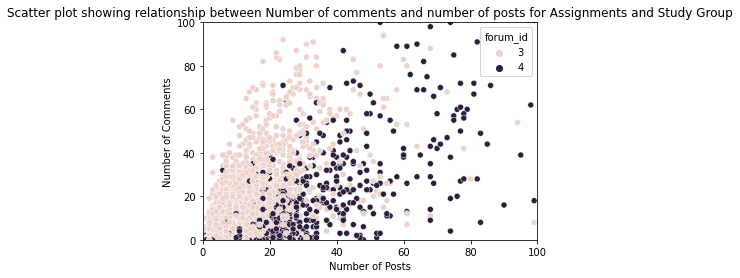

In [17]:
#plotting scatterplot for the graph4
sns.scatterplot(data=fig4_dat, x='num_posts', y='num_comments', hue='forum_id')

#setting limits for x and y axis

plt.xlim(0,100)
plt.ylim(0,100)

#setting labels and the title
plt.xlabel("Number of Posts")
plt.ylabel("Number of Comments")
plt.title("Scatter plot showing relationship between Number of comments and number of posts for Assignments and Study Group");

# Figure 2a

In [18]:
#using groupby to get the count of threads per course_id
thread_count_df = DataFrame({'thread_count' : df.groupby( [ "course_id"] ).size()}).reset_index()
thread_count_df.head()

,course_id,thread_count
0,analysenumerique-001,119
1,assetpricing-001,673
2,automata-002,429
3,bigdata-edu-001,585
4,bioinformatics-001,1160


In [19]:
#using groupby to get the thread_size of a single thread 
thread_size_df = DataFrame({'thread_size' : df.groupby( [ "thread_id"] ).size()}).reset_index()
thread_size_df.head()

,thread_id,thread_size
0,1,46
1,2,50
2,3,48
3,4,55
4,5,51


In [20]:
thread_size_df_1 = pd.merge(thread_size_df, df, on='thread_id', how='inner')[['thread_size', 'course_id']] #merging two datasets
thread_size_per_course_df = thread_size_df_1.groupby(['course_id']).mean() #using groupby to get mean thread_size count per course_id
thread_size_per_course_df.head()

,thread_size
course_id,
analysenumerique-001,57.025210
assetpricing-001,48.829123
automata-002,52.655012
bigdata-edu-001,50.029060
bioinformatics-001,40.534483


In [21]:
fig_2_a_df = pd.merge(thread_size_per_course_df, thread_count_df, on='course_id', how='inner') #merging two datasets

<AxesSubplot:xlabel='thread_count', ylabel='thread_size'>

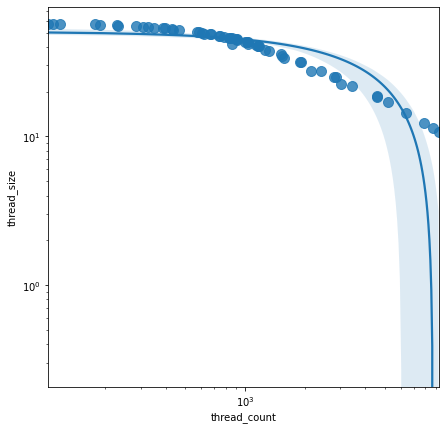

In [22]:
#plotting scatterplot
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot(x="thread_count", y="thread_size", data=fig_2_a_df, ax=ax, scatter_kws={"s": 100})

# Figure 2b

In [23]:
thread_size_df.head()

,thread_id,thread_size
0,1,46
1,2,50
2,3,48
3,4,55
4,5,51


In [39]:
user_count_df = df2.groupby('course_id')['user_id'].count().to_frame().reset_index() #grouping the user_id with respect to course_id
user_count_df['num_users'] = user_count_df['user_id'] #naming user_id as num_users

In [40]:
user_count_df.head()

,course_id,user_id,num_users
0,analysenumerique-001,741,741
1,assetpricing-001,3025,3025
2,automata-002,2715,2715
3,bigdata-edu-001,4210,4210
4,bioinformatics-001,9258,9258


In [41]:
fig_2_b_df = pd.merge(thread_size_per_course_df, user_count_df, on='course_id', how='inner') #merging two datasets

<AxesSubplot:xlabel='num_users', ylabel='thread_size'>

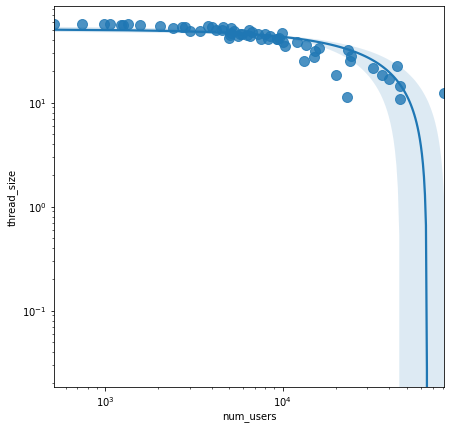

In [45]:
#plotting scatterplot
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot(x="num_users", y="thread_size", data=fig_2_b_df, ax=ax, scatter_kws={"s": 100})